<img src="https://i.imgur.com/RGQekkH.png" alt="alt text" width="300" height="300">


**Authored by Shashank Raj using Gemini AI ✨.**

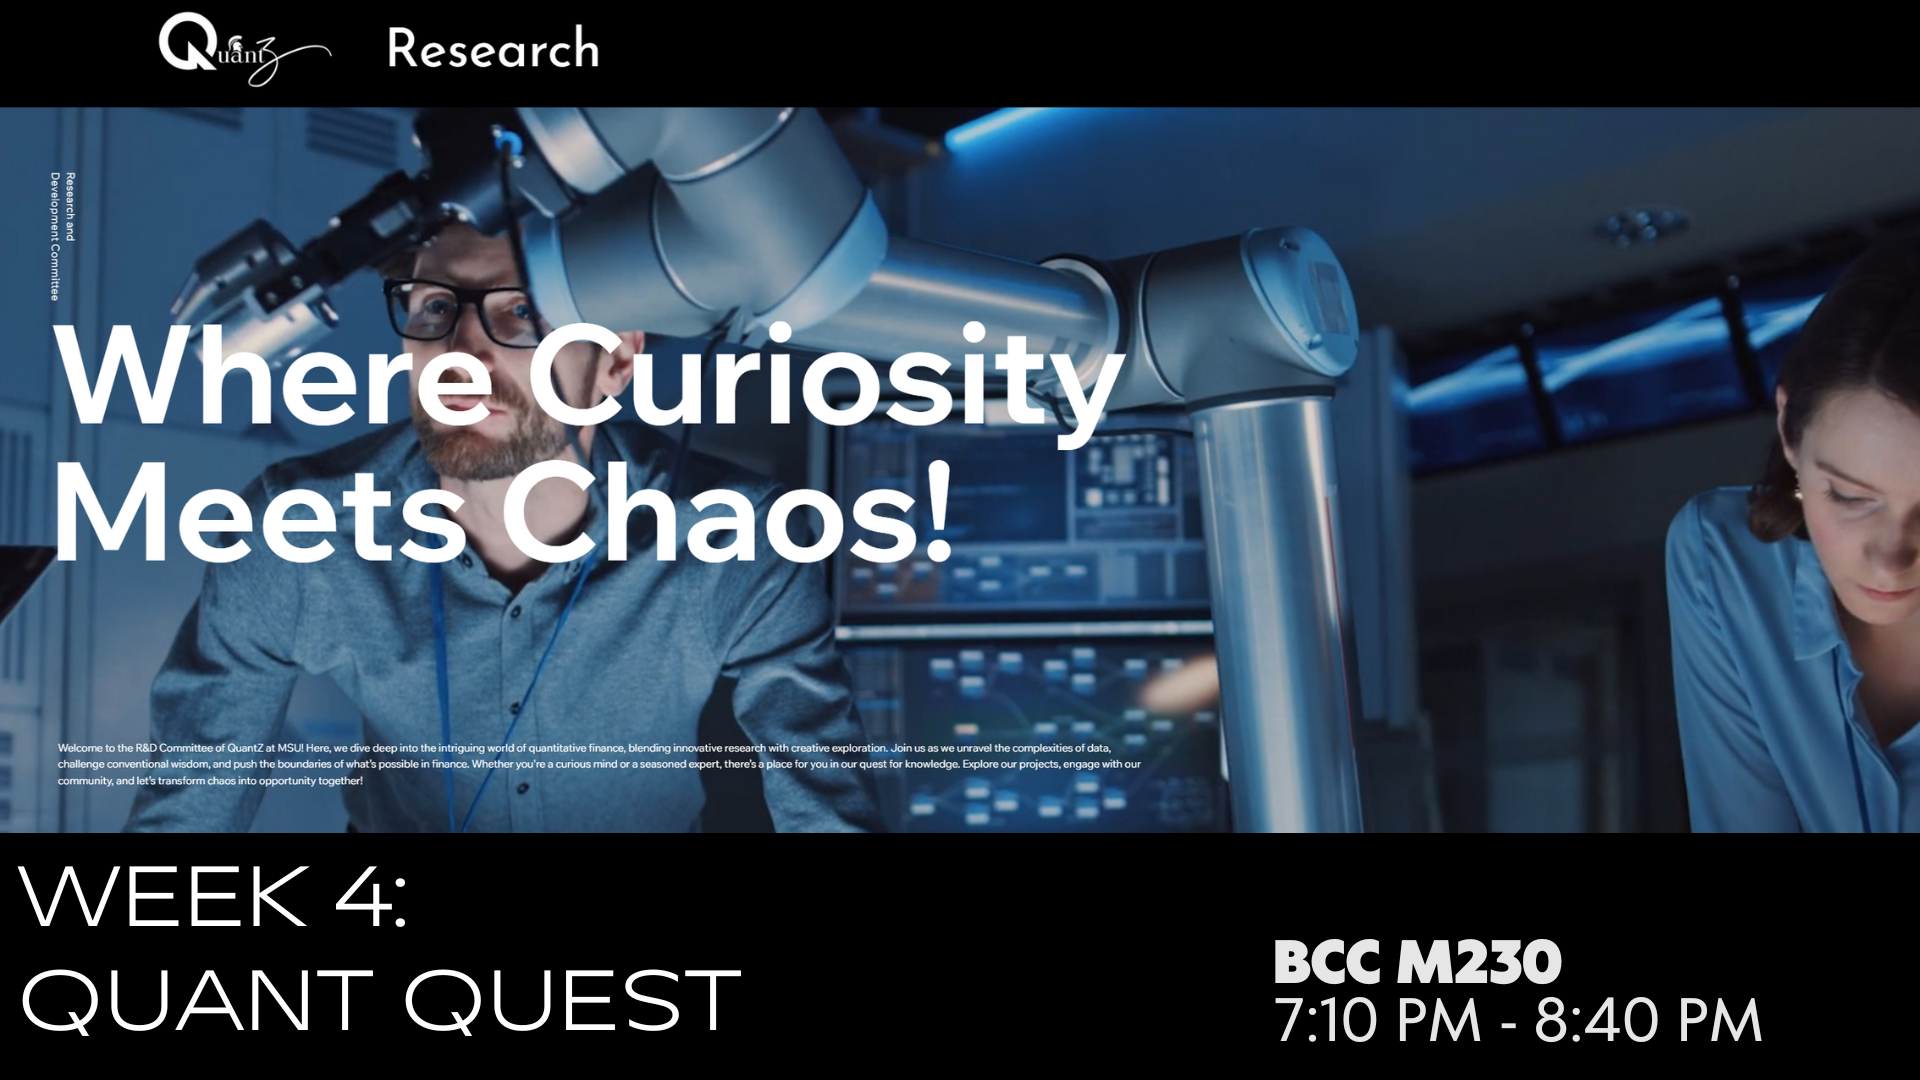

In [ ]:
# @title 📈 Portfolio Pursuit 💼 {"display-mode":"form"}

!pip install -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix --quiet

import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import matplotlib.pyplot as plt
import random

# Apply styling for better visuals
plt.style.use('seaborn-darkgrid')

# Define the Portfolio Pursuit Game
def portfolio_pursuit():
    # Game Parameters
    INITIAL_CAPITAL = 10000  # Starting capital
    NUM_ROUNDS = 10  # Total number of rounds
    ASSETS = {
        'Stock A': {'mean_return': 0.07, 'volatility': 0.15},
        'Stock B': {'mean_return': 0.06, 'volatility': 0.12},
        'Bond A': {'mean_return': 0.04, 'volatility': 0.05},
        'Commodity A': {'mean_return': 0.05, 'volatility': 0.10},
        'ETF A': {'mean_return': 0.06, 'volatility': 0.09},
    }

    asset_names = list(ASSETS.keys())
    num_assets = len(asset_names)

    # Initialize dynamic assets dictionary to store changing mean returns and volatilities
    dynamic_assets = {
        asset: {
            'mean_return': [ASSETS[asset]['mean_return']],
            'volatility': [ASSETS[asset]['volatility']]
        }
        for asset in asset_names
    }

    # Simulate dynamic changes over rounds
    for i in range(1, NUM_ROUNDS):
        for asset in asset_names:
            last_mean_return = dynamic_assets[asset]['mean_return'][-1]
            last_volatility = dynamic_assets[asset]['volatility'][-1]
            # Introduce random fluctuations
            new_mean_return = last_mean_return + np.random.normal(0, 0.005)
            new_volatility = last_volatility + np.random.normal(0, 0.005)
            # Ensure values stay within realistic bounds
            new_mean_return = max(0, min(new_mean_return, 0.15))
            new_volatility = max(0.01, min(new_volatility, 0.3))
            dynamic_assets[asset]['mean_return'].append(new_mean_return)
            dynamic_assets[asset]['volatility'].append(new_volatility)

    # Initialize Portfolio
    portfolio = {asset: 0 for asset in asset_names}
    portfolio_history = []
    capital_history = [INITIAL_CAPITAL]
    score = 0
    penalties = 0

    current_round = 1

    # Initialize market conditions
    market_conditions = []
    for i in range(NUM_ROUNDS):
        # Randomly select a market condition with certain probabilities
        market_event = random.choices(
            ['Bull Market', 'Bear Market', 'Stable Market', 'Volatile Market', 'Sector Boom', 'Sector Bust'],
            weights=[2, 2, 3, 1, 1, 1],
            k=1
        )[0]
        market_conditions.append(market_event)

    # Define Widgets
    intro_label = widgets.HTML(value="""
        <h2>📈 Portfolio Pursuit 💼</h2>
        <p>Welcome to <b>Portfolio Pursuit</b>! Manage your virtual investment portfolio over <b>10 rounds</b>. Allocate your capital among different assets each round to maximize returns while effectively managing risk. Earn points for high returns and good risk management, and incur penalties for poor decisions.</p>
        <p><b>Initial Capital:</b> $10,000</p>
        <p>Click <b>"Start Game"</b> to begin!</p>
    """)

    start_button = widgets.Button(description='Start Game', button_style='success', layout=widgets.Layout(width='150px'))

    # Allocation Sliders
    allocation_sliders = {}
    for asset in asset_names:
        allocation_sliders[asset] = widgets.IntSlider(
            value=0,
            min=0,
            max=INITIAL_CAPITAL,
            step=100,
            description=asset + ':',
            continuous_update=False,
            style={'description_width': 'initial'}
        )

    allocation_box = widgets.VBox([allocation_sliders[asset] for asset in asset_names])

    proceed_button = widgets.Button(description='Proceed to Next Round', button_style='info', disabled=True, layout=widgets.Layout(width='200px'))

    # Output Area for Round Summary
    output_area = widgets.Output()

    # Score Labels
    progress_label = widgets.HTML(value=f"Round: {current_round} / {NUM_ROUNDS}")
    score_label = widgets.HTML(value=f"Score: {score} | Penalties: {penalties}")

    # Allocation Summary
    allocation_summary = widgets.HTML(value="<b>Total Allocated:</b> $0")

    # Display Widgets
    game_ui_container = widgets.VBox([
        progress_label,
        score_label,
        allocation_box,
        allocation_summary,
        proceed_button,
        output_area
    ])

    # Function to start the game
    def start_game(b):
        nonlocal current_round, score, penalties, portfolio_history, capital_history
        clear_output(wait=True)
        display(game_ui_container)
        with output_area:
            clear_output()
            print(f"Game Started! You have ${capital_history[-1]:.2f} to allocate.")
            print(f"Market Condition: {market_conditions[current_round - 1]}")
            print("Allocate your capital among the assets and click 'Proceed to Next Round'.")

        # Reset variables in case of restart
        current_round = 1
        score = 0
        penalties = 0
        portfolio_history = []
        capital_history = [INITIAL_CAPITAL]
        for asset in asset_names:
            allocation_sliders[asset].max = capital_history[-1]
            allocation_sliders[asset].value = 0
        progress_label.value = f"Round: {current_round} / {NUM_ROUNDS}"
        score_label.value = f"Score: {score} | Penalties: {penalties}"
        allocation_summary.value = "<b>Total Allocated:</b> $0"
        proceed_button.disabled = False

    start_button.on_click(start_game)

    # Function to validate allocations
    def validate_allocations(*args):
        total_allocated = sum([allocation_sliders[asset].value for asset in asset_names])
        allocation_summary.value = f"<b>Total Allocated:</b> ${total_allocated}"
        if total_allocated > capital_history[-1]:
            proceed_button.disabled = True
        else:
            proceed_button.disabled = False

    # Attach observers to sliders
    for asset in asset_names:
        allocation_sliders[asset].observe(validate_allocations, names='value')

    # Function to simulate asset returns
    def simulate_returns(portfolio_allocations):
        returns = {}
        current_market = market_conditions[current_round - 1]
        for asset, allocation in portfolio_allocations.items():
            # Retrieve dynamic mean return and volatility for the current round
            mean_return = dynamic_assets[asset]['mean_return'][current_round - 1]
            volatility = dynamic_assets[asset]['volatility'][current_round - 1]
            # Adjust mean return and volatility based on market condition
            if current_market == 'Bull Market':
                mean_return += 0.02
            elif current_market == 'Bear Market':
                mean_return -= 0.03
            elif current_market == 'Volatile Market':
                volatility += 0.05
            elif current_market == 'Stable Market':
                volatility -= 0.02
            elif current_market == 'Sector Boom':
                if 'Stock' in asset:
                    mean_return += 0.05
            elif current_market == 'Sector Bust':
                if 'Stock' in asset:
                    mean_return -= 0.05
            # Ensure mean return and volatility stay within realistic bounds
            mean_return = max(0, min(mean_return, 0.2))
            volatility = max(0.01, min(volatility, 0.4))
            # Simulate return using a normal distribution
            simulated_return = np.random.normal(mean_return, volatility)
            returns[asset] = simulated_return
        return returns

    # Function to calculate portfolio metrics
    def calculate_metrics(portfolio_allocations, returns):
        portfolio_return = 0
        portfolio_variance = 0
        for asset, allocation in portfolio_allocations.items():
            asset_return = returns[asset]
            portfolio_return += allocation * asset_return
            portfolio_variance += (allocation ** 2) * (dynamic_assets[asset]['volatility'][current_round - 1] ** 2)
        portfolio_std = np.sqrt(portfolio_variance) / INITIAL_CAPITAL
        sharpe_ratio = (portfolio_return - 0.02 * INITIAL_CAPITAL) / portfolio_variance if portfolio_variance != 0 else 0
        # Simple VaR using historical simulation (Not exact)
        var = -1.65 * portfolio_std * INITIAL_CAPITAL  # Approximation for 95% confidence
        return portfolio_return, portfolio_std, sharpe_ratio, var

    # Function to handle proceed button click
    def proceed_round(b):
        nonlocal current_round, score, penalties, portfolio_history, capital_history
        # Validate allocations
        total_allocated = sum([allocation_sliders[asset].value for asset in asset_names])
        if total_allocated > capital_history[-1]:
            with output_area:
                clear_output()
                print(f"<span style='color: red;'>Error: Total allocation (${total_allocated}) exceeds available capital (${capital_history[-1]:.2f}).</span>")
            return

        # Get allocations
        allocations = {asset: allocation_sliders[asset].value for asset in asset_names}
        total_allocated = sum(allocations.values())

        # Calculate remaining capital
        remaining_capital = capital_history[-1] - total_allocated

        # Simulate returns
        returns = simulate_returns(allocations)

        # Calculate metrics
        portfolio_return, portfolio_std, sharpe_ratio, var = calculate_metrics(allocations, returns)

        # Update capital
        profit_loss = portfolio_return
        new_capital = capital_history[-1] + profit_loss  # Add profit/loss to total capital
        capital_history.append(new_capital)

        # Update portfolio history
        portfolio_history.append(allocations.copy())

        # Scoring Mechanism
        # Rewards for high returns and good Sharpe Ratio
        if portfolio_return > 500:
            score += 10
        elif portfolio_return > 200:
            score += 7
        elif portfolio_return > 0:
            score += 5
        else:
            penalties += 5  # Penalty for negative return

        if sharpe_ratio > 0.5:
            score += 5
        elif sharpe_ratio > 0.2:
            score += 3
        else:
            penalties += 3  # Penalty for low Sharpe Ratio

        # Penalties for high VaR
        if var < -500:
            penalties += 5
        elif var < -200:
            penalties += 3

        # Update score labels
        progress_label.value = f"Round: {current_round} / {NUM_ROUNDS}"
        score_label.value = f"Score: {score} | Penalties: {penalties}"

        # Display Round Summary
        with output_area:
            clear_output()
            print(f"**Round {current_round} Summary:**")
            print(f"**Market Condition:** {market_conditions[current_round - 1]}")
            print(f"**Allocations:**")
            for asset, amount in allocations.items():
                print(f"- {asset}: ${amount}")
            print(f"**Asset Returns (%):**")
            for asset, ret in returns.items():
                print(f"- {asset}: {ret * 100:.2f}%")
            print(f"**Profit/Loss:** ${profit_loss:.2f}")
            print(f"**Portfolio Return:** ${portfolio_return:.2f}")
            print(f"**Portfolio Standard Deviation:** {portfolio_std:.4f}")
            print(f"**Sharpe Ratio:** {sharpe_ratio:.4f}")
            print(f"**Value at Risk (VaR):** ${var:.2f}")
            print(f"**New Capital:** ${new_capital:.2f}")
            if portfolio_return > 500:
                print("<span style='color: green;'>🏆 Great job! High returns achieved!</span>")
            elif portfolio_return > 200:
                print("<span style='color: green;'>👍 Good returns!</span>")
            elif portfolio_return > 0:
                print("<span style='color: orange;'>🙂 Positive returns!</span>")
            else:
                print("<span style='color: red;'>😢 Negative returns. Better luck next round!</span>")

            # Plot Portfolio Value Over Time
            rounds = list(range(1, current_round + 2))
            plt.figure(figsize=(10,6))
            plt.plot(rounds, capital_history, marker='o', linestyle='-', color='blue')
            plt.title('Portfolio Value Over Time')
            plt.xlabel('Round')
            plt.ylabel('Capital ($)')
            plt.grid(True)
            plt.show()

        # Increment round
        current_round += 1

        # Check if game over
        if current_round > NUM_ROUNDS:
            end_game()
        else:
            # Reset sliders for next round
            for asset in asset_names:
                allocation_sliders[asset].max = capital_history[-1]
                allocation_sliders[asset].value = 0
            with output_area:
                print(f"**Round {current_round} Begins!**")
                print(f"You have ${capital_history[-1]:.2f} to allocate.")
                print(f"Market Condition: {market_conditions[current_round - 1]}")
                print("Allocate your capital among the assets and click 'Proceed to Next Round'.")

    proceed_button.on_click(proceed_round)

    # Function to end the game
    def end_game():
        nonlocal score, penalties, capital_history, portfolio_history
        clear_output(wait=True)
        # Calculate final score with a complex algorithm
        final_score = score - penalties
        rating = calculate_final_rating(final_score)

        # Display Final Results
        final_label = widgets.HTML(value=f"""
            <h2>🏁 Game Over! 🏁</h2>
            <p><b>Final Score:</b> {final_score}</p>
            <p><b>Rating:</b> {rating}</p>
        """)

        # Plot Portfolio Value Over Time
        portfolio_values = capital_history
        rounds = list(range(1, NUM_ROUNDS + 2))

        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(rounds, portfolio_values, marker='o', linestyle='-', color='blue')
        ax.set_title('Portfolio Value Over Time')
        ax.set_xlabel('Round')
        ax.set_ylabel('Capital ($)')
        plt.grid(True)
        plt.show()

        # Plot Mean Returns Over Time
        plt.figure(figsize=(10, 6))
        for asset in asset_names:
            plt.plot(
                range(1, NUM_ROUNDS + 1),
                [r * 100 for r in dynamic_assets[asset]['mean_return']],
                label=f'{asset} Mean Return'
            )
        plt.title('Asset Mean Returns Over Time')
        plt.xlabel('Round')
        plt.ylabel('Mean Return (%)')
        plt.legend()
        plt.show()

        # Plot Volatilities Over Time
        plt.figure(figsize=(10, 6))
        for asset in asset_names:
            plt.plot(
                range(1, NUM_ROUNDS + 1),
                [v * 100 for v in dynamic_assets[asset]['volatility']],
                label=f'{asset} Volatility'
            )
        plt.title('Asset Volatilities Over Time')
        plt.xlabel('Round')
        plt.ylabel('Volatility (%)')
        plt.legend()
        plt.show()

        # Display Final Label
        display(final_label)

    # Function to calculate final rating
    def calculate_final_rating(final_score):
        if final_score >= 40:
            return "🎖️ Master Portfolio Manager!"
        elif final_score >= 30:
            return "🏆 Skilled Investor!"
        elif final_score >= 20:
            return "💼 Competent Trader!"
        elif final_score >= 10:
            return "📈 Emerging Quant!"
        else:
            return "😕 Needs Improvement!"

    # Display Introductory Interface
    display(widgets.VBox([intro_label, start_button]))

# Run the Portfolio Pursuit Game
portfolio_pursuit()


In [ ]:
# @title 🤖 Algorithmic Arena 📊 {"display-mode":"form"}

!pip install -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix --quiet

import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import matplotlib.pyplot as plt
import random

# Apply styling for better visuals
plt.style.use('seaborn-darkgrid')

# Define the Algorithmic Arena Game
def algorithmic_arena():
    # Game Parameters
    INITIAL_CAPITAL = 10000  # Starting capital
    NUM_ROUNDS = 10  # Total number of rounds
    STRATEGIES = {
        'Moving Average Crossover': {'short_window': 10, 'long_window': 50},
        'Momentum Strategy': {'lookback_period': 20},
        'Mean Reversion': {'threshold': 0.05},
        'RSI Strategy': {'rsi_period': 14, 'overbought': 70, 'oversold': 30},
        'Bollinger Bands': {'window': 20, 'num_std_dev': 2},
    }

    strategy_names = list(STRATEGIES.keys())

    # Initialize Game State
    capital = INITIAL_CAPITAL
    capital_history = [capital]
    score = 0
    penalties = 0
    current_round = 1
    strategy_history = []

    # Generate Market Conditions for Each Round
    market_conditions = []
    for _ in range(NUM_ROUNDS):
        condition = random.choice(['Bull Market', 'Bear Market', 'Sideways Market', 'Volatile Market'])
        market_conditions.append(condition)

    # Define Widgets
    intro_label = widgets.HTML(value="""
        <h2>🤖 Algorithmic Arena 📊</h2>
        <p>Welcome to the <b>Algorithmic Arena</b>! Design and test your trading algorithms across <b>10 rounds</b> to see how well they perform under varying market conditions. Make strategic choices, earn rewards for successful strategies, and face penalties for underperforming ones.</p>
        <p><b>Initial Capital:</b> $10,000</p>
        <p>Click <b>"Start Game"</b> to begin!</p>
    """)

    start_button = widgets.Button(description='Start Game', button_style='success', layout=widgets.Layout(width='150px'))

    # Strategy Selection Dropdown
    strategy_dropdown = widgets.Dropdown(
        options=strategy_names,
        value=strategy_names[0],
        description='Strategy:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    # Dynamic Parameter Widgets (to be updated based on selected strategy)
    parameter_widgets = widgets.VBox()

    # Proceed Button
    proceed_button = widgets.Button(description='Proceed to Next Round', button_style='info', disabled=True, layout=widgets.Layout(width='200px'))

    # Output Area for Round Summary
    output_area = widgets.Output()

    # Score Labels
    progress_label = widgets.HTML(value=f"Round: {current_round} / {NUM_ROUNDS}")
    score_label = widgets.HTML(value=f"Score: {score} | Penalties: {penalties}")

    # Display Widgets Container
    game_ui_container = widgets.VBox([
        progress_label,
        score_label,
        strategy_dropdown,
        parameter_widgets,
        proceed_button,
        output_area
    ])

    # Function to update parameter widgets based on selected strategy
    def update_parameters(change):
        selected_strategy = strategy_dropdown.value
        params = STRATEGIES[selected_strategy]
        widgets_list = []
        for param, default in params.items():
            if 'window' in param or 'period' in param:
                slider = widgets.IntSlider(
                    value=default,
                    min=5,
                    max=100,
                    step=1,
                    description=param.replace('_', ' ').capitalize() + ':',
                    style={'description_width': 'initial'}
                )
                widgets_list.append(slider)
            elif 'threshold' in param:
                slider = widgets.FloatSlider(
                    value=default,
                    min=0.01,
                    max=0.20,
                    step=0.01,
                    description=param.replace('_', ' ').capitalize() + ':',
                    style={'description_width': 'initial'}
                )
                widgets_list.append(slider)
            elif 'overbought' in param or 'oversold' in param:
                slider = widgets.IntSlider(
                    value=default,
                    min=50,
                    max=100,
                    step=1,
                    description=param.replace('_', ' ').capitalize() + ':',
                    style={'description_width': 'initial'}
                )
                widgets_list.append(slider)
            elif 'num_std_dev' in param:
                slider = widgets.FloatSlider(
                    value=default,
                    min=1.0,
                    max=3.0,
                    step=0.1,
                    description=param.replace('_', ' ').capitalize() + ':',
                    style={'description_width': 'initial'}
                )
                widgets_list.append(slider)
            else:
                # Default to IntSlider for any unspecified parameters
                slider = widgets.IntSlider(
                    value=default,
                    min=1,
                    max=100,
                    step=1,
                    description=param.replace('_', ' ').capitalize() + ':',
                    style={'description_width': 'initial'}
                )
                widgets_list.append(slider)
        parameter_widgets.children = widgets_list

    # Attach observer to strategy dropdown
    strategy_dropdown.observe(update_parameters, names='value')

    # Initialize parameter widgets
    update_parameters(None)

    # Function to start the game
    def start_game(b):
        nonlocal current_round, score, penalties, capital_history, strategy_history
        clear_output(wait=True)
        display(game_ui_container)
        with output_area:
            clear_output()
            print(f"Game Started! You have ${capital_history[-1]:.2f} to invest.")
            print(f"Market Condition: {market_conditions[current_round - 1]}")
            print("Select your strategy, adjust the parameters, and click 'Proceed to Next Round'.")
        # Reset game state
        current_round = 1
        score = 0
        penalties = 0
        strategy_history = []
        capital_history = [INITIAL_CAPITAL]
        strategy_dropdown.value = strategy_names[0]
        update_parameters(None)
        progress_label.value = f"Round: {current_round} / {NUM_ROUNDS}"
        score_label.value = f"Score: {score} | Penalties: {penalties}"
        proceed_button.disabled = False

    start_button.on_click(start_game)

    # Function to validate and get parameters
    def get_parameters():
        selected_strategy = strategy_dropdown.value
        params = {}
        for widget in parameter_widgets.children:
            param_name = widget.description.replace(':', '').replace(' ', '_').lower()
            params[param_name] = widget.value
        return selected_strategy, params

    # Function to simulate strategy performance
    def simulate_strategy(strategy, params, market_condition):
        # Simple simulation based on strategy and market condition
        # This is a placeholder for more complex simulations
        base_return = 0
        volatility = 0.1  # Base volatility

        if strategy == 'Moving Average Crossover':
            short_window = params.get('short_window', 10)
            long_window = params.get('long_window', 50)
            # Simplistic return calculation
            if short_window < long_window:
                base_return = 0.05
            else:
                base_return = 0.03
        elif strategy == 'Momentum Strategy':
            lookback_period = params.get('lookback_period', 20)
            base_return = 0.06
        elif strategy == 'Mean Reversion':
            threshold = params.get('threshold', 0.05)
            base_return = 0.04
        elif strategy == 'RSI Strategy':
            rsi_period = params.get('rsi_period', 14)
            overbought = params.get('overbought', 70)
            oversold = params.get('oversold', 30)
            base_return = 0.05
        elif strategy == 'Bollinger Bands':
            window = params.get('window', 20)
            num_std_dev = params.get('num_std_dev', 2.0)
            base_return = 0.05
        else:
            base_return = 0.03  # Default return for unspecified strategies

        # Adjust returns based on market condition
        if market_condition == 'Bull Market':
            base_return += 0.02
        elif market_condition == 'Bear Market':
            base_return -= 0.03
        elif market_condition == 'Volatile Market':
            volatility += 0.05
        elif market_condition == 'Sideways Market':
            base_return += 0.01

        # Simulate actual return with randomness
        actual_return = np.random.normal(base_return, volatility)

        return actual_return

    # Function to calculate performance metrics
    def calculate_metrics(return_percentage, capital):
        profit = capital * return_percentage
        return profit

    # Function to handle proceed button click
    def proceed_round(b):
        nonlocal current_round, score, penalties, capital_history, strategy_history
        # Get selected strategy and parameters
        selected_strategy, params = get_parameters()

        # Get current market condition
        current_market = market_conditions[current_round - 1]

        # Simulate strategy performance
        strategy_return = simulate_strategy(selected_strategy, params, current_market)
        profit = calculate_metrics(strategy_return, capital_history[-1])
        new_capital = capital_history[-1] + profit
        capital_history.append(new_capital)
        strategy_history.append({
            'Round': current_round,
            'Strategy': selected_strategy,
            'Parameters': params,
            'Return (%)': strategy_return,
            'Profit ($)': profit,
            'Capital ($)': new_capital
        })

        # Update score and penalties
        if profit > 0:
            score += int(profit / 100)  # Reward: 1 point per $100 profit
            feedback = "<span style='color: green;'>✅ Positive Return!</span>"
        else:
            penalties += int(abs(profit) / 100)  # Penalty: 1 point per $100 loss
            feedback = "<span style='color: red;'>❌ Negative Return!</span>"

        # Additional scoring based on return magnitude
        if strategy_return > 0.07:
            score += 5  # Bonus for high returns
            feedback += " <span style='color: green;'>🎉 Excellent Performance!</span>"
        elif strategy_return < -0.05:
            penalties += 5  # Severe penalty for large losses
            feedback += " <span style='color: red;'>🔥 Significant Losses!</span>"

        # Update score labels
        progress_label.value = f"Round: {current_round} / {NUM_ROUNDS}"
        score_label.value = f"Score: {score} | Penalties: {penalties}"

        # Display Round Summary
        with output_area:
            clear_output()
            print(f"**Round {current_round} Summary:**")
            print(f"**Strategy:** {selected_strategy}")
            print(f"**Parameters:**")
            for key, value in params.items():
                print(f"- {key.replace('_', ' ').capitalize()}: {value}")
            print(f"**Market Condition:** {current_market}")
            print(f"**Strategy Return:** {strategy_return*100:.2f}%")
            print(f"**Profit/Loss:** ${profit:.2f}")
            print(f"**New Capital:** ${new_capital:.2f}")
            print(feedback)

            # Plot Portfolio Value Over Time
            rounds = list(range(1, current_round + 2))
            plt.figure(figsize=(10,6))
            plt.plot(rounds, capital_history, marker='o', linestyle='-', color='blue')
            plt.title('Portfolio Value Over Time')
            plt.xlabel('Round')
            plt.ylabel('Capital ($)')
            plt.xticks(rounds)
            plt.grid(True)
            plt.show()

        # Increment round
        current_round += 1

        # Check if game is over
        if current_round > NUM_ROUNDS:
            end_game()
        else:
            # Reset sliders for next round
            strategy_dropdown.value = strategy_names[0]
            update_parameters(None)
            with output_area:
                print(f"**Round {current_round} Begins!**")
                print(f"You have ${capital_history[-1]:.2f} to invest.")
                print(f"Market Condition: {market_conditions[current_round - 1]}")
                print("Select your strategy, adjust the parameters, and click 'Proceed to Next Round'.")

    proceed_button.on_click(proceed_round)

    # Function to end the game
    def end_game():
        nonlocal score, penalties, capital_history, strategy_history
        clear_output(wait=True)
        # Calculate final score
        final_score = score - penalties
        rating = calculate_final_rating(final_score)

        # Display Final Results
        final_label = widgets.HTML(value=f"""
            <h2>🏁 Game Over! 🏁</h2>
            <p><b>Final Score:</b> {final_score}</p>
            <p><b>Rating:</b> {rating}</p>
        """)

        # Plot Portfolio Value Over Time
        portfolio_values = capital_history
        rounds = list(range(1, NUM_ROUNDS + 2))

        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(rounds, portfolio_values, marker='o', linestyle='-', color='green')
        ax.set_title('Portfolio Value Over Time')
        ax.set_xlabel('Round')
        ax.set_ylabel('Capital ($)')
        plt.xticks(rounds)
        plt.grid(True)
        plt.show()

        # Display Final Label
        display(final_label)

    # Function to calculate final rating
    def calculate_final_rating(final_score):
        if final_score >= 50:
            return "🎖️ Algorithmic Mastermind!"
        elif final_score >= 40:
            return "🏆 Skilled Quant Trader!"
        elif final_score >= 30:
            return "💼 Competent Strategist!"
        elif final_score >= 20:
            return "📈 Emerging Algorithmic Trader!"
        else:
            return "😕 Needs Improvement!"

    # Function to handle starting the game
    def start_game_handler(b):
        start_game(b)

    # Attach observer to strategy dropdown
    strategy_dropdown.observe(update_parameters, names='value')

    # Display Introductory Interface
    display(widgets.VBox([intro_label, start_button]))

# Run the Algorithmic Arena Game
algorithmic_arena()
